# Classification Algorithms

In [ ]:
#Types of Classification

1)Logistic Regression

2)Decision Trees

3)Random Forest

4)Naive Bayes Classifier

5)Support Vector Machines

# 1)Logistic Regression

In [ ]:
Logistic Regression : it is very simple and popular supervised learning algorithm that can be used for classification 
                      problem ganerally it is used for binary class classification problem. Threshold value o.5

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
dataframe_train = pd.read_csv('titanic.csv')
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
dataframe_train.shape

(891, 12)

In [27]:
dataframe_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
dataframe_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
dataframe_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
dataframe_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
dataframe_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
dataframe_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
#All these columns seems to be irrelevant.

columns_to_drop =['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [34]:
dataframe_train = dataframe_train.drop(columns_to_drop, axis=1)
dataframe_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [35]:
dataframe_train[dataframe_train['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [46]:
# Smart way of replacing null values in age column by looking into Pclass as reference column

dataframe_train.groupby('Pclass')[['Age']].mean()



,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [47]:
dataframe_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [52]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age

In [53]:
dataframe_train['Age'] = dataframe_train[['Age', 'Pclass']].apply(age_approx, axis = 1)

In [54]:
dataframe_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [55]:
dataframe_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [59]:
# applying one hot encoding on sex col

dataframe_train_one_hot = pd.get_dummies(dataframe_train, columns = ['Sex'])

In [60]:
dataframe_train_one_hot

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True
887,1,1,19.0,0,0,30.0000,True,False
888,0,3,24.0,1,2,23.4500,True,False
889,1,1,26.0,0,0,30.0000,False,True


In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
age_mm_scaler = StandardScaler()
fare_std_scaler = StandardScaler()

dataframe_train_one_hot['Age'] = age_mm_scaler.fit_transform(dataframe_train_one_hot[['Age']])
dataframe_train_one_hot['Fare'] = fare_std_scaler.fit_transform(dataframe_train_one_hot[['Fare']])

In [63]:
dataframe_train_one_hot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,-0.538003,1,0,-0.502445,False,True
1,1,1,0.666578,1,0,0.786845,True,False
2,1,3,-0.236858,0,0,-0.488854,True,False
3,1,1,0.440719,1,0,0.420730,True,False
4,0,3,0.440719,0,0,-0.486337,False,True


In [64]:
dataframe_train_one_hot.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

Text(0.5, 1.0, 'correlation map')

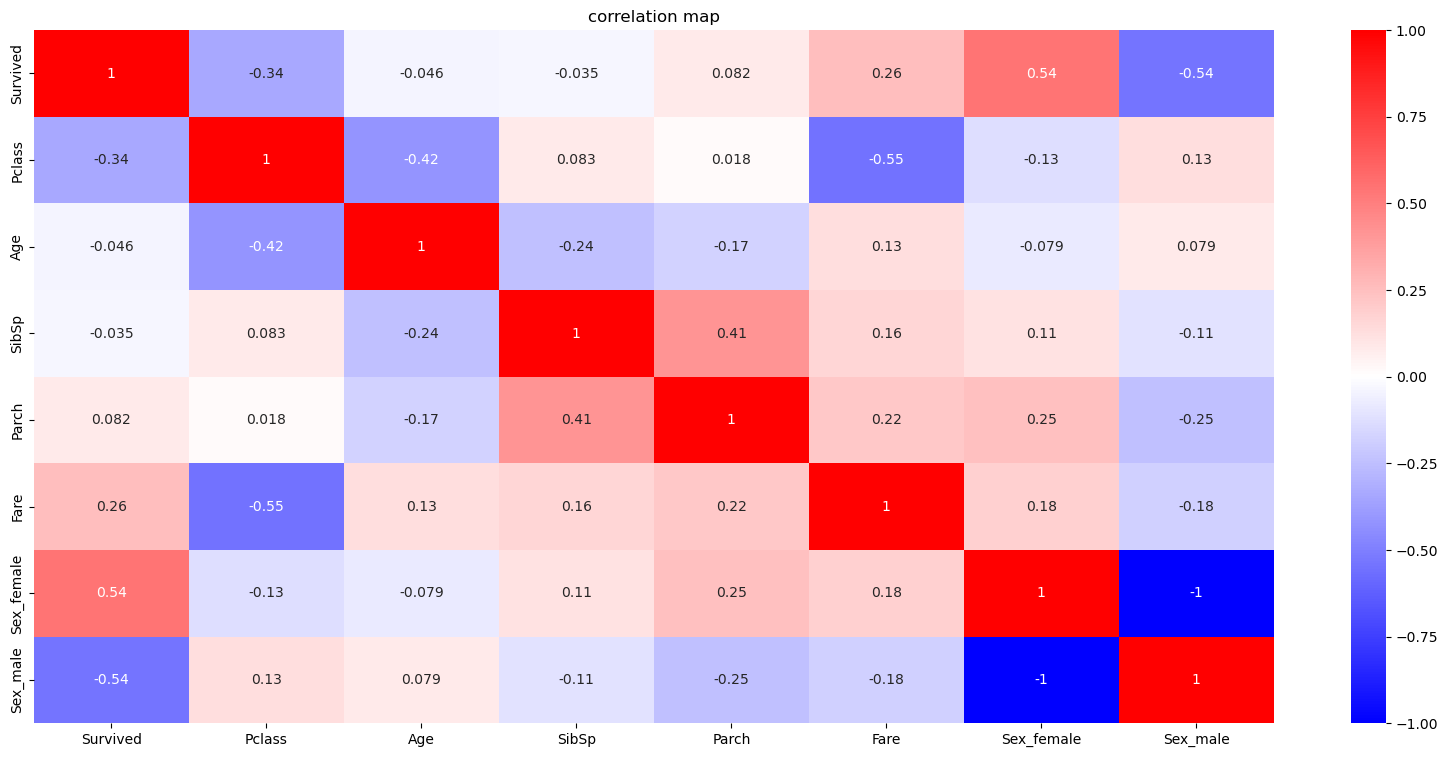

In [93]:
#to find the pairwise correlation

plt.figure(figsize=(20,9));
sns.heatmap(dataframe_train_one_hot.corr(), annot=True, cmap='bwr')
plt.title("correlation map")

In [67]:
x = dataframe_train_one_hot[['Pclass', 'Age', 'Parch', 'Fare', 'Sex_female', 'Sex_male']]
y = dataframe_train_one_hot['Survived']

In [68]:
x.shape, y.shape

((891, 6), (891,))

In [70]:
x.head()

,Pclass,Age,Parch,Fare,Sex_female,Sex_male
0,3,-0.538003,0,-0.502445,False,True
1,1,0.666578,0,0.786845,True,False
2,3,-0.236858,0,-0.488854,True,False
3,1,0.440719,0,0.420730,True,False
4,3,0.440719,0,-0.486337,False,True


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((668, 6), (223, 6), (668,), (223,))

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [88]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [89]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [94]:
for i in range(len(x_test)):
    print(logreg.predict_proba(x_test)[i])

[0.07979236 0.92020764]
[0.91921585 0.08078415]
[0.904459 0.095541]
[0.17030516 0.82969484]
[0.56667958 0.43332042]
[0.9310657 0.0689343]
[0.92246718 0.07753282]
[0.89792217 0.10207783]
[0.88363605 0.11636395]
[0.85233719 0.14766281]
[0.67077199 0.32922801]
[0.32336922 0.67663078]
[0.75982544 0.24017456]
[0.8935137 0.1064863]
[0.12377996 0.87622004]
[0.901258 0.098742]
[0.88362149 0.11637851]
[0.85043086 0.14956914]
[0.22214206 0.77785794]
[0.4524509 0.5475491]
[0.88363605 0.11636395]
[0.91598556 0.08401444]
[0.10842259 0.89157741]
[0.54453584 0.45546416]
[0.61385733 0.38614267]
[0.90187179 0.09812821]
[0.94923226 0.05076774]
[0.75982544 0.24017456]
[0.75037878 0.24962122]
[0.46989641 0.53010359]
[0.10814398 0.89185602]
[0.87665638 0.12334362]
[0.92263173 0.07736827]
[0.85955126 0.14044874]
[0.41545473 0.58454527]
[0.88371592 0.11628408]
[0.91064656 0.08935344]
[0.79777943 0.20222057]
[0.93642017 0.06357983]
[0.33674834 0.66325166]
[0.61113248 0.38886752]
[0.86804534 0.13195466]
[0.858

In [96]:
from sklearn import metrics

In [97]:
metrics.accuracy_score(y_test, y_pred)

0.8475336322869955

In [98]:
metrics.confusion_matrix(y_test, y_pred)

array([[131,  11],
       [ 23,  58]], dtype=int64)

In [99]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       142
           1       0.84      0.72      0.77        81

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



In [100]:
y_test

257    1
4      0
488    0
651    1
512    1
      ..
225    0
280    0
121    0
55     1
187    1
Name: Survived, Length: 223, dtype: int64

In [101]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)